In [43]:
import wandb
api = wandb.Api()
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
#%matplotlib gtk3

In [188]:
def get_df_selection(df, key, cond):
    '''Take only elements from the DataFrame where the *key* matches *cond*:bool'''
    elems = []
    for i in range(df.shape[0]):
        if df['config'][i]['content'][key] == str(cond):
            elems.append(df.loc[i, :])
    print(len(elems))
    return pd.DataFrame.from_records(elems)
    
def cumulative_reward(x, verbose=False):
    '''Plots R(n) where R(n) is the same of the graph from 0 to n. Essentially 
    a simple discrete integration.'''
    if verbose:
        print(f"Run length: {len(x)}")
    # Basically ignore faulty runs
    if len(x) == 0:
        return np.zeros(shape=[0,])
    ret = np.zeros([len(x),])
    ret[0] = 0
    for i in range(1, len(x)):
        ret[i] = ret[i-1] + x[i]
    return ret

def plotter(df, keys, f=None):
    '''Basic plotting utility that can apply a function on the data.'''
    f = [f if f else lambda x: x][0]
    fig, axes = plt.subplots(nrows=2, ncols=2)
    fig.set_figwidth(16)
    fig.set_figheight(8)
    for ax_idx, ax in enumerate(axes.flatten()):
        for i in range(df.shape[0]):
            data = df[keys[ax_idx]][i]
            steps = df['_step'][i]
            steps = np.linspace(0, steps[-1], len(data))
            ax.plot(steps, f(data))
            ax.set(title=keys[ax_idx], xlabel='steps')#, xlim=[0,1.4e6])
    plt.legend([x for x in df['name']], loc='lower left')
    
def plot_saver(df, key, f=None):
    '''Basic plotting utility that can apply a function on the data.'''        
    ylab = ['Success Rate' if not f else 'Cumulative Success Rate'][0]
    name = ['success_rate.eps' if not f else 'cumul_success_rate.eps'][0]
    f = [f if f else lambda x: x][0]
    fig, ax = plt.subplots()
    fig.set_figwidth(7)
    fig.set_figheight(4)
    for i in range(1, df.shape[0]):
        data = df[key][i]
        steps = df['_step'][i]
        steps = np.linspace(0, steps[-1], len(data))
        ax.plot(steps, f(data), linewidth=2)
        ax.set(title=key, xlabel='steps', ylabel=ylab, xlim=[0,1.4e6])
    fig.savefig(name)

        #plt.legend([x for x in df['name']], loc='lower left')    

In [197]:
keys = ['eval/eval_ep_rew', 'ep_rew', 'eval/eval_intr_rew', 'eval/success_rate']
df = pd.read_json('research.json')

df = get_df_selection(df, 'flat_agent', False)
#df = get_df_selection(df, 'ee_pos', True)

14


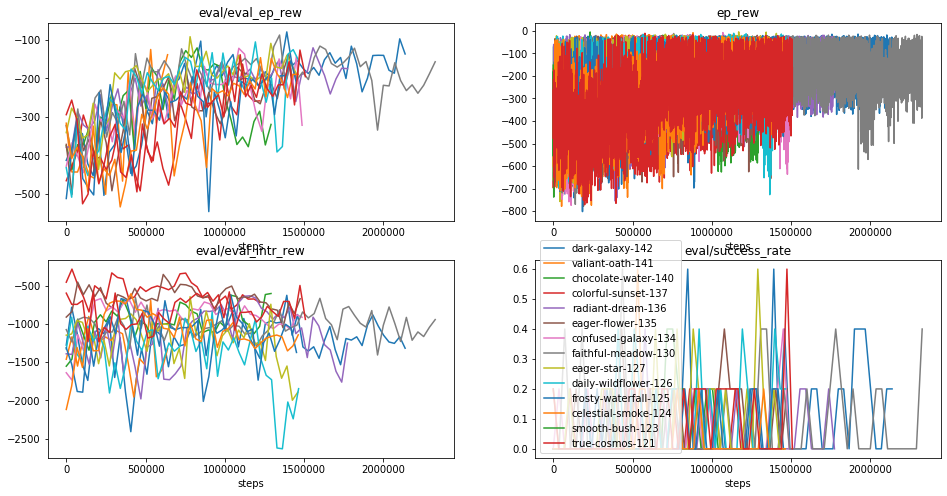

In [198]:
plotter(df, keys)

In [199]:
cumul_ep_rew = [cumulative_reward(x) if len(x) > 0 else 0 for x in df[keys[1]]]


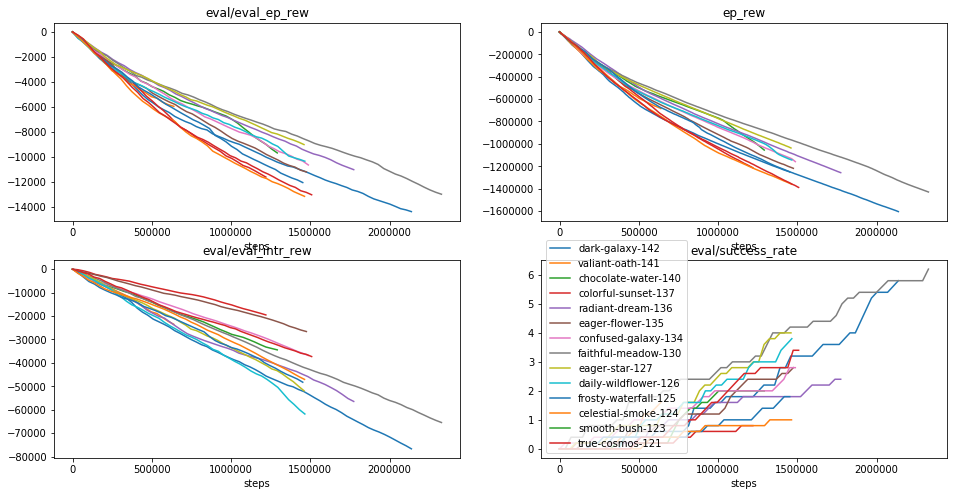

In [200]:
plotter(df, keys, cumulative_reward)

In [174]:
df['name']

0          dark-galaxy-142
1         valiant-oath-141
2      chocolate-water-140
3      colorful-sunset-137
4        radiant-dream-136
5         eager-flower-135
6      confused-galaxy-134
7      faithful-meadow-130
8           eager-star-127
9     daily-wildflower-126
10    frosty-waterfall-125
11     celestial-smoke-124
12         smooth-bush-123
13         true-cosmos-121
14          devout-dew-120
15          magic-moon-119
16           noble-fog-118
Name: name, dtype: object

In [175]:
run_hrl = df.iloc[7]
run_flat = df.iloc[14]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


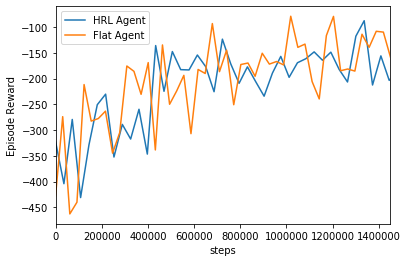

In [204]:
steps = run_hrl['_step']
data = run_hrl['eval/eval_ep_rew']
plt.plot(np.linspace(0, steps[-1], len(data)), data)
steps = run_flat['_step']
data = run_flat['eval/eval_ep_rew']
plt.plot(np.linspace(0, steps[-1], len(data)), data)
plt.xlim([0, 1.45e6])
plt.xlabel('steps')
plt.ylabel('Episode Reward')
plt.legend(['HRL Agent', 'Flat Agent'])
plt.savefig('hrl_flat_ep_rew.eps')

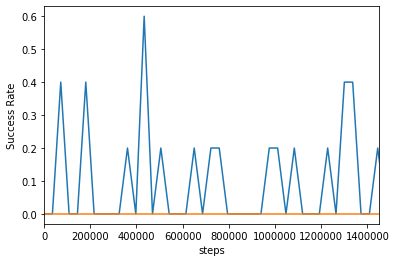

In [205]:
steps = run_hrl['_step']
data = run_hrl['eval/success_rate']
plt.plot(np.linspace(0, steps[-1], len(data)), data)
steps = run_flat['_step']
data = run_flat['eval/success_rate']
plt.plot(np.linspace(0, steps[-1], len(data)), data)
plt.xlim([0, 1.45e6])
plt.xlabel('steps')
plt.ylabel('Success Rate')
plt.savefig('hrl_flat_success.eps')

In [ ]:
'''Basic plotting utility that can apply a function on the data.'''        
    ylab = ['Success Rate' if not f else 'Cumulative Success Rate'][0]
    name = ['success_rate.eps' if not f else 'cumul_success_rate.eps'][0]
    f = [f if f else lambda x: x][0]
    fig, ax = plt.subplots()
    fig.set_figwidth(7)
    fig.set_figheight(4)
    for i in range(1, df.shape[0]):
        data = df[key][i]
        steps = df['_step'][i]
        steps = np.linspace(0, steps[-1], len(data))
        ax.plot(steps, f(data), linewidth=2)
        ax.set(title=key, xlabel='steps', ylabel=ylab, xlim=[0,1.4e6])
    fig.savefig(name)

In [155]:
df = get_df_selection(df, 'decay', True)
df = get_df_selection(df, 'ee_j_pos', True)

key = 'eval/success_rate'


7
3


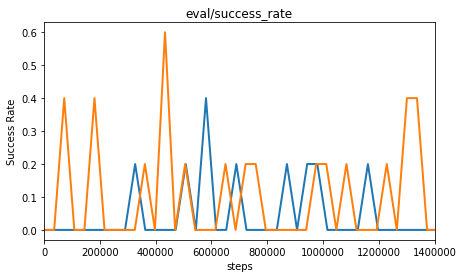

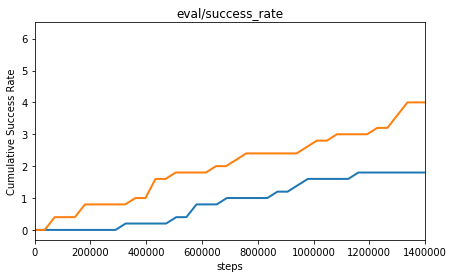

In [156]:
plot_saver(df, key)
plot_saver(df, key, cumulative_reward)

In [157]:
df

,name,config,_step,eval/eval_ep_rew,eval/eval_intr_rew,eval/success_rate,c_step,ep_rew
0,valiant-oath-141,"{'flags': {'struct': True, 'readonly': None}, ...","[155, 158, 386, 1578, 1621, 1975, 2577, 2647, ...","[-321.6762045081, -443.0073907556, -443.052159...","[-1462.8956054688, -1170.09296875, -1551.98056...","[0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[99.0, 99.0, 99.0, 99.0, 99.0, 98.0, 98.0, 98....","[-257.3820896098, -376.1575036491, -588.703813..."
1,radiant-dream-136,"{'flags': {'struct': True, 'readonly': None}, ...","[6946, 17959, 19940, 26686, 30627, 40368, 4473...","[-379.1418085877, -376.2289990312, -286.191291...","[-1391.4228515625, -1399.852734375, -984.31562...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[99.0, 99.0, 99.0, 98.0, 98.0, 98.0, 98.0, 97....","[-253.5685169429, -289.9070637993, -646.553378..."
2,faithful-meadow-130,"{'flags': {'struct': True, 'readonly': None}, ...","[1897, 4464, 7820, 7831, 13532, 19775, 20219, ...","[-322.7170023497, -404.1722469387, -279.386036...","[-1076.1142578125, -1236.7418945312, -946.3885...","[0.0, 0.0, 0.4, 0.0, 0.0, 0.4, 0.0, 0.0, 0.0, ...","[99.0, 99.0, 98.0, 98.0, 98.0, 97.0, 97.0, 97....","[-284.772692475, -340.3605071269, -666.6711594..."


In [149]:
df['config'][2]

{'flags': {'struct': True, 'readonly': None},
 'parent': None,
 'content': {'env': 'Vrep',
  'log': 'True',
  'tau': '0.005',
  'mock': 'False',
  'seed': '2',
  'vrep': 'True',
  'decay': 'True',
  'force': 'True',
  'ri_re': 'False',
  'visit': 'False',
  'c_step': '100',
  'ee_pos': 'False',
  'entity': 'rlpractitioner',
  'policy': 'TD3',
  'render': 'False',
  'discount': '0.99',
  'ee_j_pos': 'True',
  'sub_mock': 'False',
  'zero_obs': '0',
  'eval_freq': '30000',
  'goal_type': 'Absolute',
  'meta_mock': 'False',
  'offpolicy': 'False',
  'sub_noise': '50.0',
  'batch_size': '128',
  'expl_noise': '0.1',
  'flat_agent': 'False',
  'load_model': 'False',
  'meta_noise': '0.5',
  'noise_clip': '0.5',
  'save_model': 'False',
  'sparse_rew': 'False',
  'sub_ctr_lr': '0.0001',
  'time_limit': '300',
  'meta_ctr_lr': '0.01',
  'policy_freq': '2',
  'sub_actr_lr': '0.0001',
  'meta_actr_lr': '0.0001',
  'policy_noise': '0.2',
  'step_decayer': "{'total_steps': 500000, 'init_step': '$